# loading the data

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [28]:
iris = load_iris()
X = iris.data
Y= iris.target

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=43,stratify=Y)

print(X_train,X_train.shape)

[[4.6 3.4 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [6.4 3.2 4.5 1.5]
 [6.1 2.9 4.7 1.4]
 [6.9 3.1 5.1 2.3]
 [5.4 3.4 1.7 0.2]
 [4.6 3.2 1.4 0.2]
 [5.7 2.8 4.5 1.3]
 [5.8 4.  1.2 0.2]
 [5.6 2.7 4.2 1.3]
 [6.5 3.  5.8 2.2]
 [7.7 3.  6.1 2.3]
 [4.6 3.6 1.  0.2]
 [7.  3.2 4.7 1.4]
 [5.6 2.5 3.9 1.1]
 [6.9 3.1 4.9 1.5]
 [5.1 2.5 3.  1.1]
 [6.7 3.3 5.7 2.5]
 [5.2 2.7 3.9 1.4]
 [5.5 2.4 3.8 1.1]
 [6.8 2.8 4.8 1.4]
 [5.5 2.6 4.4 1.2]
 [4.4 2.9 1.4 0.2]
 [5.5 4.2 1.4 0.2]
 [7.7 3.8 6.7 2.2]
 [6.3 2.9 5.6 1.8]
 [5.9 3.  4.2 1.5]
 [5.8 2.7 4.1 1. ]
 [5.8 2.7 3.9 1.2]
 [5.6 3.  4.1 1.3]
 [4.4 3.  1.3 0.2]
 [5.  3.4 1.5 0.2]
 [6.9 3.2 5.7 2.3]
 [6.3 2.5 5.  1.9]
 [4.3 3.  1.1 0.1]
 [5.1 3.8 1.5 0.3]
 [4.9 3.6 1.4 0.1]
 [6.7 3.  5.2 2.3]
 [5.7 3.  4.2 1.2]
 [5.7 2.6 3.5 1. ]
 [6.2 2.9 4.3 1.3]
 [5.2 3.4 1.4 0.2]
 [6.  2.2 4.  1. ]
 [5.4 3.7 1.5 0.2]
 [7.9 3.8 6.4 2. ]
 [6.5 3.  5.5 1.8]
 [4.8 3.  1.4 0.3]
 [6.7 3.  5.  1.7]
 [5.4 3.9 1.7 0.4]
 [6.  2.2 5.  1.5]
 [5.8 2.8 5.1 2.4]
 [5.  2.  3.5 1. ]
 [4.7 3.2 1.

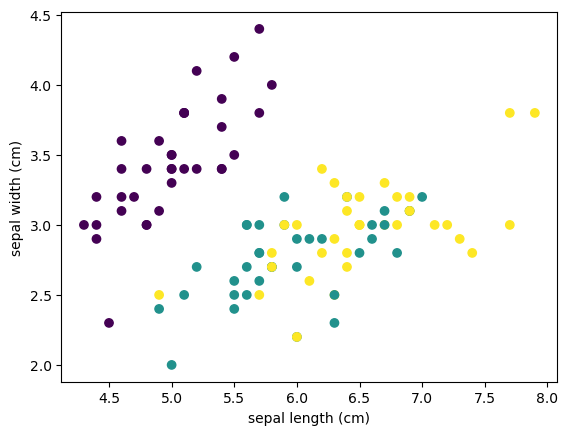

In [30]:
# print the data in a graph
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.xlabel(iris.feature_names[0])  # "sepal length (cm)"
plt.ylabel(iris.feature_names[1])

plt.scatter(X_train[:,0],X_train[:,1],c= Y_train,cmap="viridis")


# this tells that the data is not linearly seperable
 expcept when y = 0 sentosa that is linearly seperarabel by y = 1 and y =2 

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

clf = SVC(kernel="linear")
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred, target_names=iris.target_names))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
# doing it with GA 
* the chromosome will be [w1,w2,w3,.....wn,b]
* fitness = 0.5 * ||w||^2 + penalty

In [ ]:
def svm_fitness(chromosome, X, Y, penalty=1000):
    w = chromosome[:2]
    b = chromosome[2]
    # Margin violations
    violations = np.maximum(0, 1 - Y * (X @ w + b))
    penalty_term = penalty * np.sum(violations)
    # Objective: 1/2 * ||w||^2 + penalty
    return 0.5 * np.sum(w**2) + penalty_term